In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split


import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

In [13]:
# columns_to_read = ['Age', 'EstimatedSalary', 'Purchased']

# Read the CSV file with only the specified columns
# df = pd.read_csv('Social_Network_Ads.csv', usecols=columns_to_read)
df = pd.read_csv('Social_Network_Ads.csv')

In [14]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


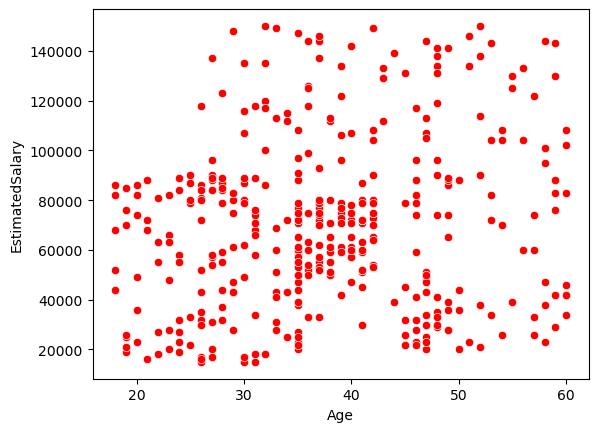

In [15]:
# here plot the scatter plot 
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1],color = 'r')
plt.show()

In [16]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
# here using the train ans split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
# here we using kears for making the sequential model 
model = Sequential()

model.add(Dense(128,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [21]:
history = model.fit(x_train,y_train,validation_data =(x_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5113 - loss: 202.0633 - val_accuracy: 0.6000 - val_loss: 154.4864
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 113.8386 - val_accuracy: 0.6000 - val_loss: 120.0492
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 93.7052 - val_accuracy: 0.6000 - val_loss: 170.2013
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5629 - loss: 119.7066 - val_accuracy: 0.6000 - val_loss: 125.3919
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6556 - loss: 71.5897 - val_accuracy: 0.4000 - val_loss: 24.1880
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5026 - loss: 17.7146 - val_accuracy: 0.6000 - val_loss: 38.3807
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5839 - loss: 42.4957 - val_accuracy: 0.4000 - val_loss: 30.3551
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4163 - loss: 43.6216 - v

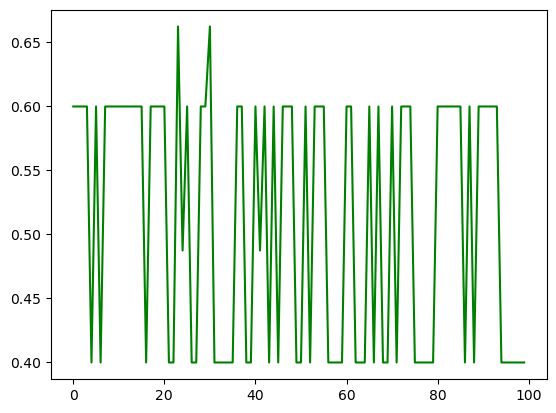

In [24]:
# here ploting the val accuracy 
plt.plot(history.history['val_accuracy'],color = 'g')
plt.show()

# Applying scalling 

In [26]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_train_scaled 

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

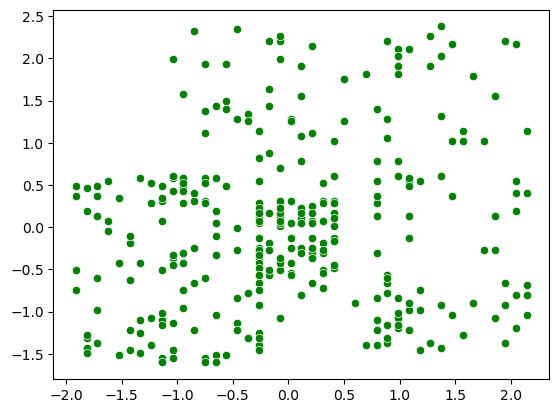

In [35]:
sns.scatterplot(x = x_train_scaled[:,0], y = x_train_scaled[:,1],color = 'g')
plt.show()

In [37]:
# here we using kears for making the sequential model 
model = Sequential()

model.add(Dense(128,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(x_train_scaled,y_train,validation_data =(x_test_scaled,y_test),epochs=100)

Epoch 1/100


x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6724 - loss: 0.6693 - val_accuracy: 0.8625 - val_loss: 0.6171
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8420 - loss: 0.6131 - val_accuracy: 0.9000 - val_loss: 0.5643
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8366 - loss: 0.5696 - val_accuracy: 0.8375 - val_loss: 0.5192
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8443 - loss: 0.5295 - val_accuracy: 0.8125 - val_loss: 0.4818
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8450 - loss: 0.4980 - val_accuracy: 0.8125 - val_loss: 0.4491
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8671 - loss: 0.4492 - val_accuracy: 0.8250 - val_loss: 0.4222
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8751 - loss: 0.4239 - val_accuracy: 0.8375 - val_loss: 0.3985
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8755 - loss: 0.4255 - val_accuracy: 0.8500 - val_loss: 0.

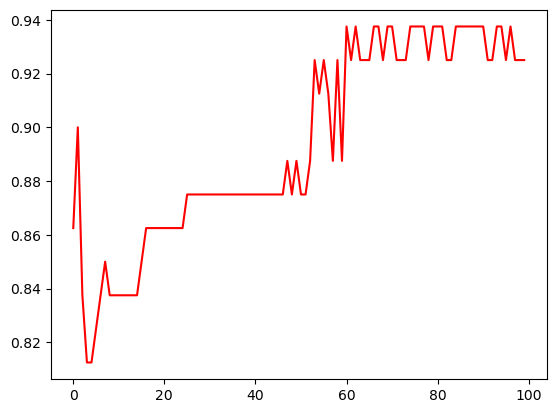

In [39]:
plt.plot(history.history['val_accuracy'],color = 'r')
plt.show()